# Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statistics as st

In [2]:
dt=pd.read_csv("C:/Users/Rania Yunaningrum/Downloads/waterQuality1 (1).csv",sep=',')
dt.head(5)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


# Pemeriksaan Tipe Data

### Dimensi/Ukuran Data

In [3]:
dt.shape #data terdiri dari 7999 baris dan 21 kolom

(7999, 21)

### Tipe Data

In [4]:
dt.dtypes
#Variabel amonnia dan is_safe memiliki tipe data yang kurang sesuai

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

### Ubah Tipe Data

In [5]:
dt.ammonia = dt.ammonia.astype('float64',errors='ignore')
dt.is_safe = dt.is_safe.astype('int64',errors='ignore')

In [6]:
dt.is_safe.value_counts()

0        7084
1         912
#NUM!       3
Name: is_safe, dtype: int64

# Cleaning Data

### Pengecekan Data Duplikat

In [7]:
#Cek Baris yang Merupakan Data Duplikat
dt[dt.duplicated()]

#Hitung Data Duplikat
dt.duplicated().sum()

0

### Pengecekan Data Missing Value

In [8]:
#Pengecekan Data NA di semua kolom
dt.isna().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [9]:
#Pengecekan Nilai Minimal Data
dt.min()

aluminium        0.0
ammonia        #NUM!
arsenic          0.0
barium           0.0
cadmium          0.0
chloramine       0.0
chromium         0.0
copper           0.0
flouride         0.0
bacteria         0.0
viruses          0.0
lead             0.0
nitrates         0.0
nitrites         0.0
mercury          0.0
perchlorate      0.0
radium           0.0
selenium         0.0
silver           0.0
uranium          0.0
is_safe        #NUM!
dtype: object

In [10]:
#Pengecekan Nilai Minimal Data
dt.max()

aluminium       5.05
ammonia         9.99
arsenic         1.05
barium          4.94
cadmium         0.13
chloramine      8.68
chromium         0.9
copper           2.0
flouride         1.5
bacteria         1.0
viruses          1.0
lead             0.2
nitrates       19.83
nitrites        2.93
mercury         0.01
perchlorate    60.01
radium          7.99
selenium         0.1
silver           0.5
uranium         0.09
is_safe            1
dtype: object

In [11]:
#Imputasi Data NA Variabel Ammonia
dta=dt[dt['ammonia']!='#NUM!']
meda=dta.ammonia.median() #menghitung nilai median amonia tanpa #NUM!
meda

#Mengisi data missing value variabel ammonia (replace value)
dt['ammonia'] = dt['ammonia'].replace(['#NUM!'], meda)
len(dt[dt['ammonia']=='#NUM!']) #cek kolom bernilai #NUM!

0

In [12]:
#Mengecek parameter aluminium, ammonia, barium hingga uranium yang tidak sesuai dengan batas rekomendasi air layak minum
for x in range(0, 7999):
    if dt.iloc[x,20]=="#NUM!":
        if dt.iloc[x].aluminium > 2.8: cal=1
        else: cal=0
        if dt.iloc[x].ammonia > 32.5: cam=1
        else: cam=0
        if dt.iloc[x].arsenic > 0.01: car=1
        else: car=0
        if dt.iloc[x].barium > 2: cbar=1
        else: cbar=0
        if dt.iloc[x].cadmium > 0.005: ccad=1
        else: ccad=0
        if dt.iloc[x].chloramine > 4: cchlo=1
        else: cchlo=0
        if dt.iloc[x].chromium > 0.1: cchro=1
        else: cchro=0
        if dt.iloc[x].copper > 1.3: ccop=1
        else: ccop=0
        if dt.iloc[x].flouride > 1.5: cflo=1
        else: cflo=0
        if dt.iloc[x].bacteria > 0: cbac=1
        else: cbac=0
        if dt.iloc[x].viruses > 0: cvir=1
        else: cvir=0
        if dt.iloc[x].lead > 0.015: clead=1
        else: clead=0
        if dt.iloc[x].nitrates > 10: cnta=1
        else: cnta=0
        if dt.iloc[x].nitrites > 1: cnti=1
        else: cnti=0
        if dt.iloc[x].mercury > 0.002: cmer=1
        else: cmer=0
        if dt.iloc[x].perchlorate > 56: cpc=1
        else: cpc=0
        if dt.iloc[x].radium > 5: crad=1
        else: crad=0
        if dt.iloc[x].selenium > 0.5: csel=1
        else: csel=0
        if dt.iloc[x].silver > 0.1: csil=1
        else: csil=0
        if dt.iloc[x].uranium > 0.3: cur=1
        else: cur=0
            
        #menghitung banyaknya parameter kualitas air minum yang tidak sesuai (melebihi maksimum batas rekomendasi)
        c = cal + cam + car + cbar + ccad + cchlo + cchro + ccop + cflo + cbac + cvir + clead + cnta + cnti + cmer + cpc + crad + csel + csil + cur 
        print("terdapat ",c," parameter kualitas air yang tidak terpenuhi pada data baris ke-", x)
        pv=(c/21)*100 #presentase parameter yang tidak sesuai
        if pv > 50 : dt.iloc[x,20]=dt.iloc[x,20].replace("#NUM!",'0') #jika banyak parameter yang tidak memenuhi besarnya >50%, maka dikatakan tidak layak minum (0)
        else :dt.iloc[x,20]=dt.iloc[x,20].replace("#NUM!",'1') #jika banyak parameter yang tidak memenuhi besarnya <50%, maka dikatakan layak minum (1)

terdapat  5  parameter kualitas air yang tidak terpenuhi pada data baris ke- 7551
terdapat  6  parameter kualitas air yang tidak terpenuhi pada data baris ke- 7568
terdapat  6  parameter kualitas air yang tidak terpenuhi pada data baris ke- 7890


In [13]:
dt.is_safe.value_counts() #cek apakah imputasi berhasil

0    7084
1     915
Name: is_safe, dtype: int64

### Ubah Tipe Data Kembali

In [14]:
dt.dtypes #cek tipe data dt

aluminium      float64
ammonia         object
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe         object
dtype: object

In [15]:
dt.ammonia = dt.ammonia.astype('float64') #ubah tipe data ammonia
dt.is_safe = dt.is_safe.astype('int64') #ubah tipe data is_safe
dt.dtypes #terlihat tipe data variabel ammonia dan is_safe sudah sesuai

aluminium      float64
ammonia        float64
arsenic        float64
barium         float64
cadmium        float64
chloramine     float64
chromium       float64
copper         float64
flouride       float64
bacteria       float64
viruses        float64
lead           float64
nitrates       float64
nitrites       float64
mercury        float64
perchlorate    float64
radium         float64
selenium       float64
silver         float64
uranium        float64
is_safe          int64
dtype: object

In [16]:
#Pengecekan Nilai Minimal Data
dt.min()

aluminium      0.00
ammonia       -0.08
arsenic        0.00
barium         0.00
cadmium        0.00
chloramine     0.00
chromium       0.00
copper         0.00
flouride       0.00
bacteria       0.00
viruses        0.00
lead           0.00
nitrates       0.00
nitrites       0.00
mercury        0.00
perchlorate    0.00
radium         0.00
selenium       0.00
silver         0.00
uranium        0.00
is_safe        0.00
dtype: float64

### Imputasi Nilai Ammonia Negatif

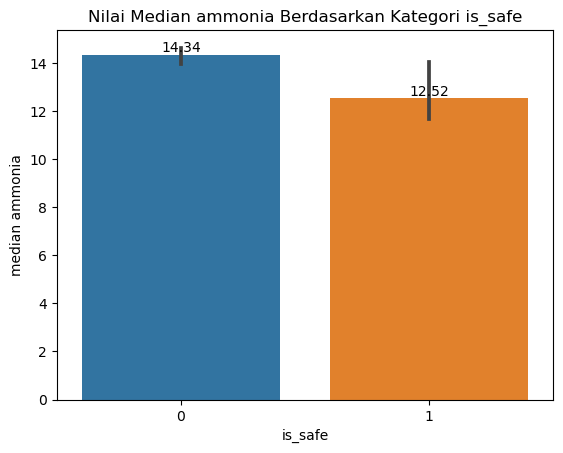

is_safe
0    14.34
1    12.52
Name: ammonia, dtype: float64

In [17]:
#Hubungan variabel ammonium dan is_safe
ax=sns.barplot(data=dt, y = "ammonia", x = "is_safe", estimator = np.median)
ax.bar_label(ax.containers[0])
plt.title('Nilai Median ammonia Berdasarkan Kategori is_safe')
plt.ylabel('median ammonia')
plt.show()
#Nilai Median Applicant Income by Self_Employed and Education
dt.groupby(['is_safe'])['ammonia'].median()

In [18]:
#Mengganti data negatif variabel ammonia (replace value)
for j in range(0,7999):
    if dt.iloc[j,1]<0: #mengganti nilai jika ammonia < 0
        if dt.iloc[j,20]==0: #jika variabel indeks 20 (is_safe) = 0, maka nilai ammonia diganti 14,34
            dt.iloc[j,1]=14.34
        else: #jika variabel indeks 20 (is_safe) = 1, maka nilai ammonia diganti 12,52
            dt.iloc[j,1]=12.52

In [19]:
#Cek kembali nilai minimum ammonia
dt.ammonia.min()

0.0

### Pengecekan Outlier

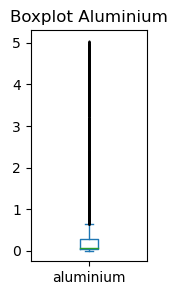

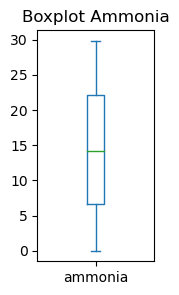

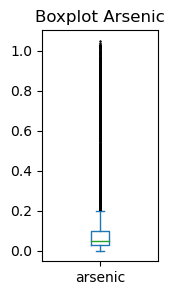

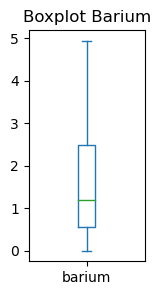

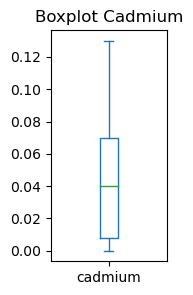

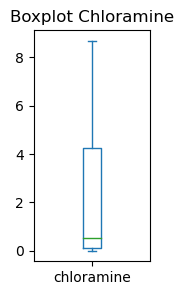

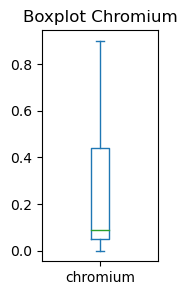

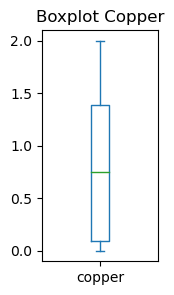

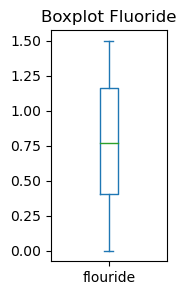

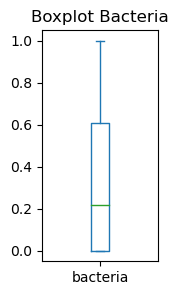

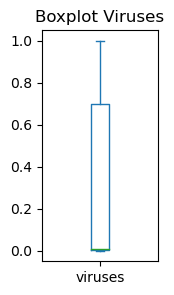

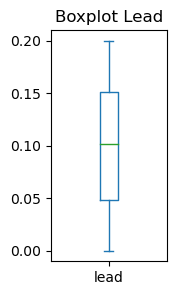

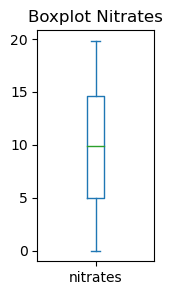

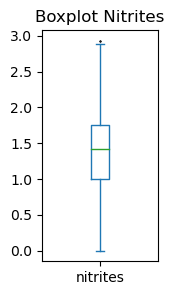

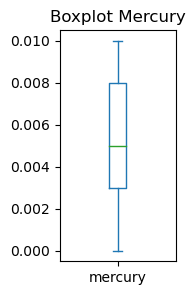

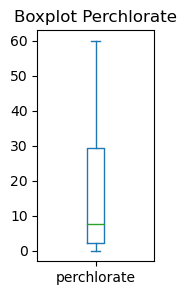

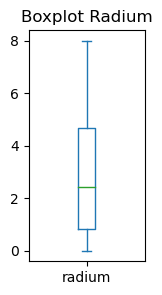

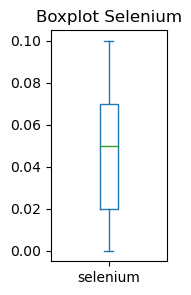

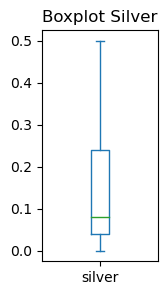

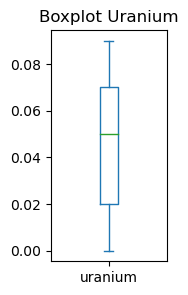

In [20]:
#Membuat boxplot untuk semua variabel
for k in range (0,20):
    dp=dt.iloc[:,k]
    plt.figure(figsize=(1.5,3))
    if k==0:
        dp.plot(kind='box',title='Boxplot Aluminium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==1:
        dp.plot(kind='box',title='Boxplot Ammonia',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==2:
        dp.plot(kind='box',title='Boxplot Arsenic',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==3:
        dp.plot(kind='box',title='Boxplot Barium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==4:
        dp.plot(kind='box',title='Boxplot Cadmium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==5:
        dp.plot(kind='box',title='Boxplot Chloramine',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==6:
        dp.plot(kind='box',title='Boxplot Chromium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==7:
        dp.plot(kind='box',title='Boxplot Copper',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==8:
        dp.plot(kind='box',title='Boxplot Fluoride',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==9:
        dp.plot(kind='box',title='Boxplot Bacteria',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==10:
        dp.plot(kind='box',title='Boxplot Viruses',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==11:
        dp.plot(kind='box',title='Boxplot Lead',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==12:
        dp.plot(kind='box',title='Boxplot Nitrates',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==13:
        dp.plot(kind='box',title='Boxplot Nitrites',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==14:
        dp.plot(kind='box',title='Boxplot Mercury',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==15:
        dp.plot(kind='box',title='Boxplot Perchlorate',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==16:
        dp.plot(kind='box',title='Boxplot Radium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==17:
        dp.plot(kind='box',title='Boxplot Selenium',flierprops={'marker': 'o', 'markersize': 0.5})
    elif k==18:
        dp.plot(kind='box',title='Boxplot Silver',flierprops={'marker': 'o', 'markersize': 0.5})
    else:
        dp.plot(kind='box',title='Boxplot Uranium',flierprops={'marker': 'o', 'markersize': 0.5})
    plt.show()

### Standarisasi Variabel Aluminium dan Arsenic (Terindikasi Outlier)

In [21]:
# Standarisasi Data menggunakan Z-Score
dt['aluminium_zs']=(dt['aluminium']-dt['aluminium'].mean())/dt['aluminium'].std()
dt['arsenic_zs']=(dt['arsenic']-dt['arsenic'].mean())/dt['arsenic'].std()

dt.head(7)

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe,aluminium_zs,arsenic_zs
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1,0.777651,-0.480799
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1,1.307235,-0.599568
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0,0.271780,-0.480799
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1,0.548429,-0.480799
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1,0.200642,-0.520389
5,0.94,14.47,0.03,2.88,0.003,0.80,0.43,1.38,0.11,0.67,...,1.89,0.006,27.17,5.42,0.08,0.19,0.02,1,0.216451,-0.520389
6,2.36,5.60,0.01,1.35,0.004,1.28,0.62,1.88,0.33,0.13,...,1.78,0.007,45.34,2.84,0.10,0.24,0.08,0,1.338852,-0.599568


# Karakteristik Data

### Statistika Deskriptif

In [22]:
dt1=dt.iloc[:,0:20] #memilih data numerik
dt1.describe().applymap('{:,.3f}'.format) #memunculkan nilai statisika deskriptif

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,"7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000","7,999.000"
mean,0.666,14.296,0.161,1.568,0.043,2.177,0.247,0.806,0.772,0.320,0.329,0.099,9.819,1.330,0.005,16.460,2.921,0.050,0.148,0.045
std,1.265,8.863,0.253,1.216,0.036,2.567,0.271,0.654,0.435,0.329,0.378,0.058,5.541,0.573,0.003,17.687,2.323,0.029,0.144,0.027
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,0.040,6.600,0.030,0.560,0.008,0.100,0.050,0.090,0.405,0.000,0.002,0.048,5.000,1.000,0.003,2.170,0.820,0.020,0.040,0.020
50%,0.070,14.160,0.050,1.190,0.040,0.530,0.090,0.750,0.770,0.220,0.008,0.102,9.930,1.420,0.005,7.740,2.410,0.050,0.080,0.050
75%,0.280,22.130,0.100,2.480,0.070,4.240,0.440,1.390,1.160,0.610,0.700,0.151,14.610,1.760,0.008,29.480,4.670,0.070,0.240,0.070
max,5.050,29.840,1.050,4.940,0.130,8.680,0.900,2.000,1.500,1.000,1.000,0.200,19.830,2.930,0.010,60.010,7.990,0.100,0.500,0.090


In [23]:
dt.is_safe.value_counts() #statistika deskriptif variabel is_safe

0    7084
1     915
Name: is_safe, dtype: int64

array([[<AxesSubplot:title={'center':'aluminium'}>,
        <AxesSubplot:title={'center':'ammonia'}>,
        <AxesSubplot:title={'center':'arsenic'}>,
        <AxesSubplot:title={'center':'barium'}>],
       [<AxesSubplot:title={'center':'cadmium'}>,
        <AxesSubplot:title={'center':'chloramine'}>,
        <AxesSubplot:title={'center':'chromium'}>,
        <AxesSubplot:title={'center':'copper'}>],
       [<AxesSubplot:title={'center':'flouride'}>,
        <AxesSubplot:title={'center':'bacteria'}>,
        <AxesSubplot:title={'center':'viruses'}>,
        <AxesSubplot:title={'center':'lead'}>],
       [<AxesSubplot:title={'center':'nitrates'}>,
        <AxesSubplot:title={'center':'nitrites'}>,
        <AxesSubplot:title={'center':'mercury'}>,
        <AxesSubplot:title={'center':'perchlorate'}>],
       [<AxesSubplot:title={'center':'radium'}>,
        <AxesSubplot:title={'center':'selenium'}>,
        <AxesSubplot:title={'center':'silver'}>,
        <AxesSubplot:title={'center':'

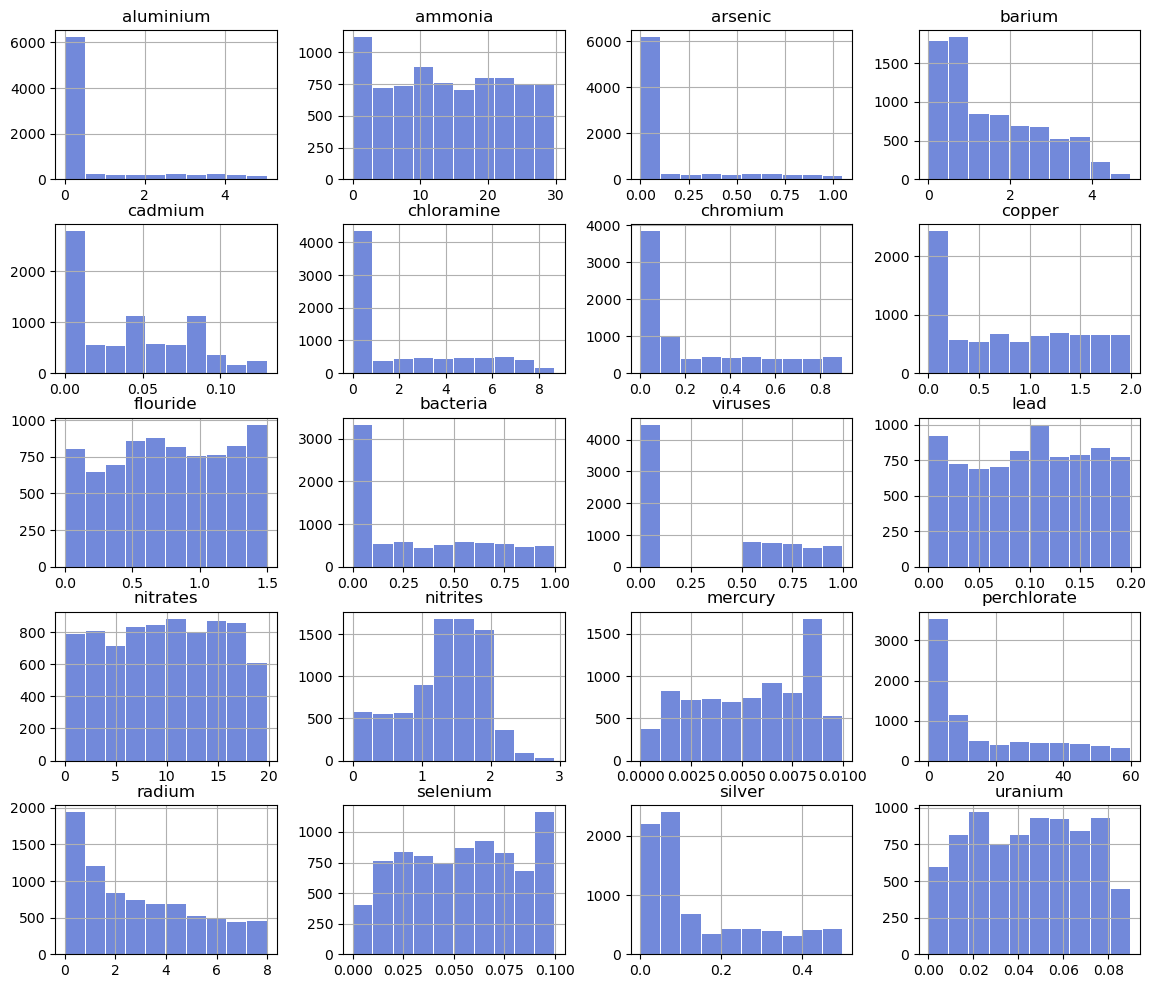

In [24]:
dt1.hist(figsize=(14, 12),color='#7289da',rwidth=0.95) #plot histogram semua variabel numerik

# Feature Selection

### Metode ANOVA

In [25]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif, chi2

In [26]:
##ANOVA (Input : Numerik, Output : Kategorik)
#Misalkan akan dipilih variabel numerik yang mempengaruhi is_safe
X = dt.iloc[:,0:20]
y = dt.iloc[:,20]

#Feature Selection ANOVA
fsanova = SelectKBest(score_func=f_classif,k=10)
fit=fsanova.fit(X,y)
dfscores=pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns) #kolom dataframe

#Hasil Feature Selection ANOVA
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns=['Selected_columns','Score_ANOVA']

#print best fearures
print(featureScores.nlargest(10,'Score_ANOVA'))

   Selected_columns  Score_ANOVA
0         aluminium   997.043964
4           cadmium   558.060442
5        chloramine   285.270642
6          chromium   271.674432
2           arsenic   123.923516
18           silver    84.186802
10          viruses    77.216413
3            barium    65.644819
19          uranium    45.752568
15      perchlorate    45.038202


### Metode Wrapper

In [27]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [28]:
#WRAPPER backward (Recursive feature elimination)
Xw = dt.iloc[:,0:20] #x harus numerik
yw=dt.iloc[:,20] #respon menggunakan regresi logistik harus nominal biner

model_wrap=LogisticRegression(random_state=1234)
rfe=RFE(model_wrap, n_features_to_select=10) #memilih 10 variabel terbaik dalam model
fit=rfe.fit(Xw,yw) #nilai fit/prediksi model
print("Num Features : %s"%(fit.n_features_)) #jumlah variabel yang dipilih
print("Selected Features: %s"%(fit.support_)) #status variabel terbaik
print("Selected Features: %s"%(fit.ranking_)) #variabel yang dipilih

feature_names=np.array(Xw.columns)
print('Most important features (RFE) : %s'%feature_names[rfe.support_]) #hasil pemilihan variabel terbaik

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logis

Num Features : 10
Selected Features: [ True False  True False  True False  True False False  True  True  True
 False False False False False  True  True  True]
Selected Features: [ 1  9  1  6  1  4  1  2  5  1  1  1  8  3 11 10  7  1  1  1]
Most important features (RFE) : ['aluminium' 'arsenic' 'cadmium' 'chromium' 'bacteria' 'viruses' 'lead'
 'selenium' 'silver' 'uranium']


### Metode Embedded (Lasso)

In [29]:
from sklearn.linear_model import Lasso
Xlasso = dt.iloc[:,0:20]
ylasso=dt.iloc[:,20]
ydlasso = pd.get_dummies(ylasso) #perlu didummykan
yd2=ydlasso.iloc[:,1] #is_safe = 1 yang sudah didummykan

lasso=Lasso(3) #ubah lambda = alpha
lasso.fit(Xlasso,yd2) #x dan y merupakan variabel numerik

lasso_coef=pd.DataFrame({'Feature':Xlasso.columns,'LassoCoef':lasso.coef_}).sort_values(by='LassoCoef',ascending=False) #mengurutkan nilai lasso terbesar

lasso_coef['LassoCoef']=abs(lasso_coef['LassoCoef'])
lasso_coef.sort_values(by='LassoCoef',ascending=False)

#mengenolkan koefisien lasso dgn meninggikan lambda
lasso_df=lasso_coef.sort_values(by='LassoCoef',ascending=False).head(10)
lasso_df=pd.DataFrame({'Lasso Method' : lasso_df['Feature'].values})
lasso_df

,Lasso Method
0,aluminium
1,ammonia
2,arsenic
3,barium
4,cadmium
5,chloramine
6,chromium
7,copper
8,flouride
9,bacteria


# SVM

In [30]:
#SVM
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn import datasets
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score, recall_score, f1_score

In [31]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   aluminium     7999 non-null   float64
 1   ammonia       7999 non-null   float64
 2   arsenic       7999 non-null   float64
 3   barium        7999 non-null   float64
 4   cadmium       7999 non-null   float64
 5   chloramine    7999 non-null   float64
 6   chromium      7999 non-null   float64
 7   copper        7999 non-null   float64
 8   flouride      7999 non-null   float64
 9   bacteria      7999 non-null   float64
 10  viruses       7999 non-null   float64
 11  lead          7999 non-null   float64
 12  nitrates      7999 non-null   float64
 13  nitrites      7999 non-null   float64
 14  mercury       7999 non-null   float64
 15  perchlorate   7999 non-null   float64
 16  radium        7999 non-null   float64
 17  selenium      7999 non-null   float64
 18  silver        7999 non-null 

In [32]:
#Variabel yang digunakan untuk SVM
y=dt['is_safe']
x=dt.loc[:,['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria']]
y1=y.values 
x1=x.values

In [33]:
from sklearn.metrics import roc_auc_score
from sklearn import svm

In [34]:
#Menggunakan Cross Validation
cv=StratifiedKFold(n_splits=5, random_state=None) #menentukan banyaknya K (pembagian fold) = 10
ss=svm.SVC(class_weight=None,random_state=2) #parameter C dalam SVM tidak terboboti, pengacakan data untuk estimasi probabilitas
model=ss.fit(x1,y1) #pemodelan svm
model

SVC(random_state=2)

In [35]:
#PARAMETER
#Pemilihan parameter C, kernel, gamma, terbaik
#Parameter SVM ada 3 yaitu C,kernel,gamma
parameter={
    'kernel':('linear','poly','rbf'),
    'C':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000],
    'gamma':[0.0001,0.001,0.01,0.1,1,10,100,1000,10000]
}
grid=GridSearchCV(model,parameter,cv=cv,n_jobs=1,scoring='accuracy') #mencari nilai akurasi model SVM dari setiap iterasi CV
grid

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=SVC(random_state=2), n_jobs=1,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'gamma': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                                   10000],
                         'kernel': ('linear', 'poly', 'rbf')},
             scoring='accuracy')

In [36]:
# mencari best parameter
#gridfit = grid.fit(x,y)
#gridfit.best_params_

# KERNEL LINEAR

In [37]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.1, kernel = 'linear', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom
#kernel = linear, poly, rbf

In [38]:
svm.fit(x1,y1)
y_pred1 = svm.predict(x)
y_pred1

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [40]:
for train_index, test_index in kf.split(x1,y1):
    x_train, x_test = x1[train_index], x1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    svm.fit(x_train, y_train)
    y_pred1 = svm.predict(x_test)
    cm.append((confusion_matrix(y_test, y_pred1)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi1=np.mean(ac)
spesifisiti1=np.mean(sp)
sensitiviti1=np.mean(se)
print("Akurasi : ",akurasi1)
print("Spesifisitas : ", spesifisiti1)
print("Sensitivitas :", sensitiviti1)

#performansi masing masing fold
df_k1=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k1=pd.concat([df_k1,pd.DataFrame(test[i])],axis=1)
df_k1.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k1

Akurasi :  0.762110694183865
Spesifisitas :  0.17267759562841528
Sensitivitas : 0.8382498235709246


,Akurasi,Spesitifitas,Sensitivitas
0,0.268125,0.863388,0.191249
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# KERNEL POLY

In [41]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.1, kernel = 'poly', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom
#kernel = linear, oly, rbf

In [42]:
svm.fit(x1,y1)
y_pred2 = svm.predict(x1)
y_pred2

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [44]:
for train_index, test_index in kf.split(x1,y1):
    x_train, x_test = x1[train_index], x1[test_index]
    y_train, y_test = y1[train_index], y1[test_index]
    svm.fit(x_train, y_train)
    y_pred2 = svm.predict(x_test)
    cm.append((confusion_matrix(y_test, y_pred2)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi2=np.mean(ac)
spesifisiti2=np.mean(sp)
sensitiviti2=np.mean(se)
print("Akurasi : ",akurasi2)
print("Spesifisitas : ", spesifisiti2)
print("Sensitivitas :", sensitiviti2)

#performansi masing masing fold
df_k2=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k2=pd.concat([df_k2,pd.DataFrame(test[i])],axis=1)
df_k2.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k2

Akurasi :  0.7701106941838649
Spesifisitas :  0.22622950819672133
Sensitivitas : 0.8403669724770643


,Akurasi,Spesitifitas,Sensitivitas
0,0.300625,0.808743,0.235004
1,0.869375,0.114754,0.966831
2,0.901875,0.142077,1.000000
3,0.893125,0.065574,1.000000
4,0.885553,0.000000,1.000000


# KERNEL RBF

In [45]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.1, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom
#kernel = linear, poly, rbf

In [46]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [47]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [48]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.7853606941838649
Spesifisitas :  0.2983606557377049
Sensitivitas : 0.8482709950599858


,Akurasi,Spesitifitas,Sensitivitas
0,0.310000,0.830601,0.242766
1,0.906875,0.196721,0.998589
2,0.913750,0.245902,1.000000
3,0.910625,0.218579,1.000000
4,0.885553,0.000000,1.000000


# Diperoleh bahwa kernel rbf memiliki tingkat akurasi yang lebih tinggi dibandingkan dengan kernel linear maupun kernel poly

# Membandingkan nilai C dan gamma optimum pada kernel rbf

# C = 0.0001

In [49]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=0.0001, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [50]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [51]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [52]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# C = 0.001

In [53]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=0.001, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [54]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [55]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [56]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# C = 0.01

In [57]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=0.01, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [58]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [59]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [60]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# C = 0.1

In [61]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=0.1, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [62]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [63]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [64]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# C = 1

In [65]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [66]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [68]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# C = 10

In [69]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=10, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [70]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [71]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [72]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.793860694183865
Spesifisitas :  0.12568306010928962
Sensitivitas : 0.8801693719124912


,Akurasi,Spesitifitas,Sensitivitas
0,0.426875,0.628415,0.400847
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# C = 100

In [73]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=100, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [74]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [75]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [76]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.7724856941838649
Spesifisitas :  0.15081967213114753
Sensitivitas : 0.8527875793930839


,Akurasi,Spesitifitas,Sensitivitas
0,0.320000,0.754098,0.263938
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# C = 1000

In [77]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1000, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [78]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [80]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.762985694183865
Spesifisitas :  0.17049180327868851
Sensitivitas : 0.8395201129146084


,Akurasi,Spesitifitas,Sensitivitas
0,0.272500,0.852459,0.197601
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# C = 10000

In [81]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=10000, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [82]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [83]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [84]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.7614856941838649
Spesifisitas :  0.17267759562841528
Sensitivitas : 0.837544107268878


,Akurasi,Spesitifitas,Sensitivitas
0,0.265000,0.863388,0.187721
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# Membandingkan nilai Gamma dengan C = 1

# Gamma = 0.0001

In [85]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.0001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [86]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [87]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [88]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# Gamma = 0.001

In [89]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.001, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [90]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [91]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [92]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.793985694183865
Spesifisitas :  0.12459016393442623
Sensitivitas : 0.8804516584333097


,Akurasi,Spesitifitas,Sensitivitas
0,0.427500,0.622951,0.402258
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 0.01

In [93]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.01, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [94]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [95]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [96]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.7738606941838649
Spesifisitas :  0.1519125683060109
Sensitivitas : 0.8541990119971772


,Akurasi,Spesitifitas,Sensitivitas
0,0.326875,0.759563,0.270995
1,0.885625,0.000000,1.000000
2,0.885625,0.000000,1.000000
3,0.885625,0.000000,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 0.1

In [97]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 0.1, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [98]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [99]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [100]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.7853606941838649
Spesifisitas :  0.2983606557377049
Sensitivitas : 0.8482709950599858


,Akurasi,Spesitifitas,Sensitivitas
0,0.310000,0.830601,0.242766
1,0.906875,0.196721,0.998589
2,0.913750,0.245902,1.000000
3,0.910625,0.218579,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 1

In [101]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 1, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [102]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 0, 0, 0], dtype=int64)

In [103]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [104]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8016106941838649
Spesifisitas :  0.35628415300546445
Sensitivitas : 0.8591390261115033


,Akurasi,Spesitifitas,Sensitivitas
0,0.408125,0.825137,0.354270
1,0.876875,0.377049,0.941426
2,0.923125,0.327869,1.000000
3,0.914375,0.251366,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 10

In [105]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 10, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [106]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [107]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [108]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.884110694183865
Spesifisitas :  0.005464480874316941
Sensitivitas : 0.9976005645730417


,Akurasi,Spesitifitas,Sensitivitas
0,0.884375,0.010929,0.997177
1,0.878125,0.005464,0.990826
2,0.885625,0.000000,1.000000
3,0.886875,0.010929,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 100

In [109]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 100, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [110]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [111]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [112]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8854856941838648
Spesifisitas :  0.002185792349726776
Sensitivitas : 0.9995765702187722


,Akurasi,Spesitifitas,Sensitivitas
0,0.886250,0.005464,1.000000
1,0.884375,0.000000,0.998589
2,0.885000,0.000000,0.999294
3,0.886250,0.005464,1.000000
4,0.885553,0.000000,1.000000


# Gamma = 1000

In [113]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 1000, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [114]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [115]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [116]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8858606941838649
Spesifisitas :  0.002185792349726776
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.886250,0.005464,1.0
1,0.885625,0.000000,1.0
2,0.885625,0.000000,1.0
3,0.886250,0.005464,1.0
4,0.885553,0.000000,1.0


# Gamma = 10000

In [117]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 10000, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [118]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [119]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [120]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8856106941838648
Spesifisitas :  0.0
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.885625,0.0,1.0
1,0.885625,0.0,1.0
2,0.885625,0.0,1.0
3,0.885625,0.0,1.0
4,0.885553,0.0,1.0


# Model Optimal

In [121]:
from sklearn import svm
svm = svm.SVC(class_weight=None, C=1, gamma = 1000, kernel = 'rbf', random_state=100)
n = 5
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits = n, random_state = None)
#c bisa custom

In [122]:
svm.fit(x1,y1)
y_pred3 = svm.predict(x1)
y_pred3

array([1, 1, 0, ..., 1, 1, 1], dtype=int64)

In [123]:
#membuat tempat
cm=[]
total = []
ac = []
se = []
sp = []

In [124]:
for train_index, test_index in kf.split(x1,y1):
    x_train_1, x_test_1 = x1[train_index], x1[test_index]
    y_train_1, y_test_1 = y1[train_index], y1[test_index]
    svm.fit(x_train_1, y_train_1)
    y_pred3 = svm.predict(x_test_1)
    cm.append((confusion_matrix(y_test_1, y_pred3)).astype(float))
for j in range (n):
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))
akurasi3=np.mean(ac)
spesifisiti3=np.mean(sp)
sensitiviti3=np.mean(se)
print("Akurasi : ",akurasi3)
print("Spesifisitas : ", spesifisiti3)
print("Sensitivitas :", sensitiviti3)


#performansi masing masing fold
df_k3=pd.DataFrame()
test=dict()
for j in range (3):
    test[j]=[]
for i in range (n):
    test[0].append(ac[i])
    test[1].append(sp[i])
    test[2].append(se[i])
for i in range (3):
    df_k3=pd.concat([df_k3,pd.DataFrame(test[i])],axis=1)
df_k3.columns=['Akurasi','Spesitifitas','Sensitivitas']
df_k3

Akurasi :  0.8858606941838649
Spesifisitas :  0.002185792349726776
Sensitivitas : 1.0


,Akurasi,Spesitifitas,Sensitivitas
0,0.886250,0.005464,1.0
1,0.885625,0.000000,1.0
2,0.885625,0.000000,1.0
3,0.886250,0.005464,1.0
4,0.885553,0.000000,1.0


# Evaluasi Model Optimal

Text(0.5, 23.52222222222222, 'predict label')

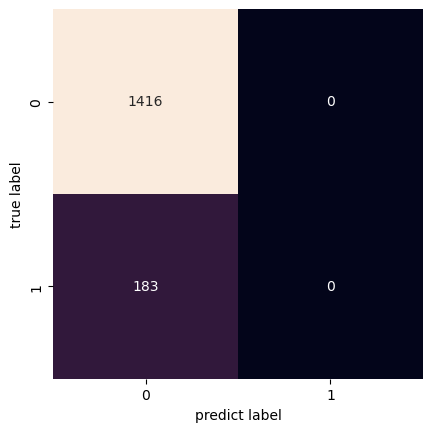

In [125]:
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_test_1, y_pred3)
sns.heatmap(conf_matrix, square = True, annot = True, fmt = 'd', cbar = False)
plt.ylabel('true label')
plt.xlabel('predict label')

In [126]:
akurasi = accuracy_score(y_test_1,y_pred3)
presisi = precision_score(y_test_1,y_pred3, pos_label = 0, average = None)
recalls = recall_score(y_test_1,y_pred3,pos_label = 0, average = None)
sensitivitas = conf_matrix[0,0]/(conf_matrix[0,0]+conf_matrix[0,1])
spesifitas = conf_matrix[1,1]/(conf_matrix[1,0]+conf_matrix[1,1])
f1_score = f1_score(y_test_1,y_pred3)
print('Akurasi', akurasi)
print('Presisi',presisi)
print('Recalls',recalls)
print('Sensitivitas',sensitivitas)
print('Spesifitas',spesifitas)
print('F1 score',f1_score)

Akurasi 0.8855534709193246
Presisi [0.88555347 0.        ]
Recalls [1. 0.]
Sensitivitas 1.0
Spesifitas 0.0
F1 score 0.0


C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [127]:
from sklearn.svm import SVC
svc = SVC()

In [128]:
from sklearn import svm
model = SVC(probability = True).fit(x_train,y_train)
probs = model.predict_proba(x_test_1)[:,1]

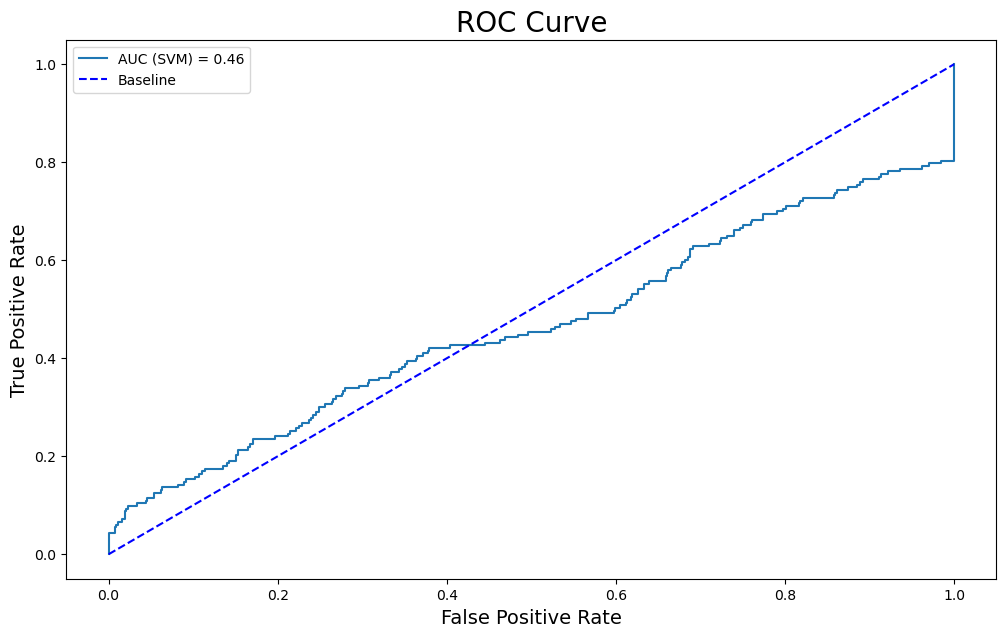

In [129]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

auc = roc_auc_score(y_test_1, probs)
fpr, tpr, threshold = roc_curve(y_test_1, probs)

plt.figure(figsize=(12, 7))
plt.plot(fpr, tpr, label=f'AUC (SVM) = {auc:.2f}')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

# Decision Tree

In [153]:
#Variabel yang digunakan untuk Decision Tree
yt=dt['is_safe']
xt=dt.loc[:,['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria']]

In [154]:
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn import metrics
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
from sklearn.tree import export_text

In [155]:
#Pemodelan Decision Tree
clf=tree.DecisionTreeClassifier() #fungsi untuk menjalankan algoritma decision tree
clf=clf.fit(xt,yt) #mengklasifikasikan y berdasarkan variabel x menggunakan metode decision tree

#Membuat pemodelan tree untuk data testing dan training
clf=tree.DecisionTreeClassifier()
x_traintree, x_testtree, y_traintree, y_testtree = train_test_split(xt,yt,test_size=0.20,random_state=100) # 80% data untuk training, 20% testing

clf=clf.fit(x_traintree,y_traintree) #mengklasifikasikan data y_train berdasarkan variabel x_train menggunakan metode decision tree
y_predtree=clf.predict(x_testtree) #hasil prediksi klasifikasi decision tree

In [156]:
skema_tree=export_text(clf,feature_names=['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria'])
print(skema_tree)

|--- aluminium_zs <= -0.21
|   |--- aluminium_zs <= -0.44
|   |   |--- viruses <= 0.50
|   |   |   |--- bacteria <= 0.01
|   |   |   |   |--- viruses <= 0.00
|   |   |   |   |   |--- chromium <= 0.35
|   |   |   |   |   |   |--- bacteria <= 0.00
|   |   |   |   |   |   |   |--- chromium <= 0.05
|   |   |   |   |   |   |   |   |--- arsenic_zs <= -0.62
|   |   |   |   |   |   |   |   |   |--- chloramine <= 0.05
|   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |--- chloramine >  0.05
|   |   |   |   |   |   |   |   |   |   |--- barium <= 1.48
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |   |--- barium >  1.48
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 2
|   |   |   |   |   |   |   |   |--- arsenic_zs >  -0.62
|   |   |   |   |   |   |   |   |   |--- silver <= 0.10
|   |   |   |   |   |   |   |   |   |   |--- barium <= 0.36
|   |   |   |   |   |   |   |   |   |   |   |

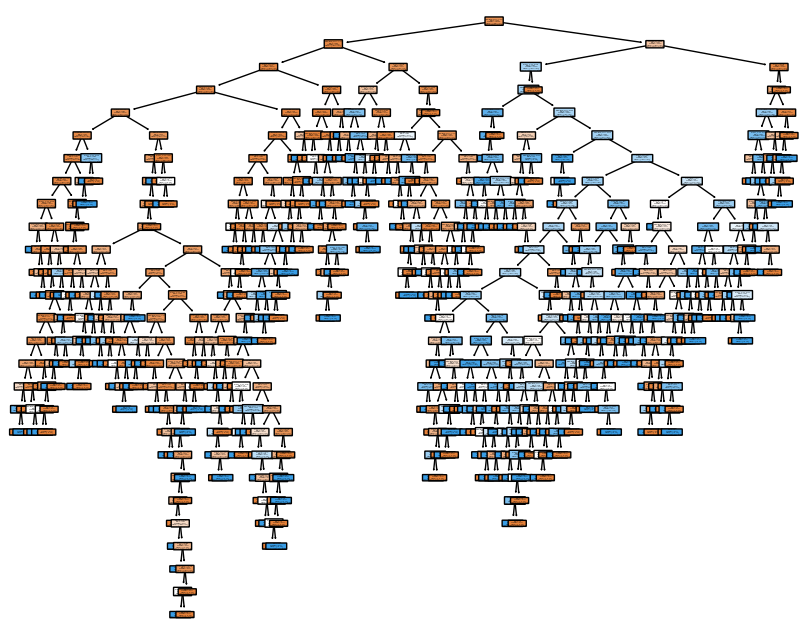

In [157]:
#Plot Node Decision Tree
plt.figure(figsize=(10,8)) #set ukuran plot
plot_tree(clf, #menampilkan plot decision tree
         feature_names=['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria'], #nama variabel senagai node
         class_names=['safe for drinking','not safe for drinking'], #kategori hasil klasifikasi
         rounded=True, #membulatkan angka yang menjadi batas keputusan
         filled=True, #menambahkan warna pada setiap variabel
         proportion=True); #menampilkan proporsi

In [158]:
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz

#Import Plot sebagai Gambar
feature_cols=['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria']
export_graphviz(clf,out_file='.tree_png',
               filled=True,rounded=True,
               special_characters=True,feature_names=feature_cols,class_names=['yes','no'])

In [159]:
#Membuat matriks konfusi
y_predtree2={} #membuat tempat untuk menyimpan y_predict
y_predtree2['klasifikasi_tree']=clf.predict(x_testtree) #menyimpan hasil prediksi klasifikasi x_test decision tree

conf_matrix={} #membuat tempat untuk menyimpan elemen matriks konfusi
classif_name={'klasifikasi_tree'} #mengambil elemen dengan nama 'klasifikasi_tree'
for name in classif_name: #membuat matriks konfusi dari data y_testtree dan y_preditree
    conf_matrix[name]=pd.DataFrame(data=confusion_matrix(y_testtree,y_predtree2[name]),
                                  columns=dt['is_safe'].unique(),
                                  index=dt['is_safe'].unique())
conf_matrix['klasifikasi_tree']

,1,0
1,1329,91
0,81,99


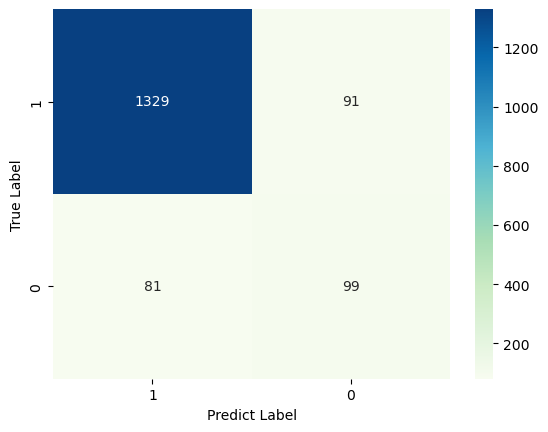

In [160]:
#Membuat heatmap matriks konfusi decision tree
sns.heatmap(conf_matrix['klasifikasi_tree'],annot=True,cmap='GnBu',fmt='.4g').set(ylabel='True Label',xlabel='Predict Label')
plt.show()

In [161]:
conf_matrixtree = confusion_matrix(y_testtree, y_predtree)
conf_matrixtree

array([[1329,   91],
       [  81,   99]], dtype=int64)

In [162]:
akurasi = accuracy_score(y_testtree,y_predtree)
presisi = precision_score(y_testtree,y_predtree, pos_label = 0, average = None)
recalls = recall_score(y_testtree,y_predtree,pos_label = 0, average = None)
sensitivitas = conf_matrixtree[0,0]/(conf_matrixtree[0,0]+conf_matrixtree[0,1])
spesifitas = conf_matrixtree[1,1]/(conf_matrixtree[1,0]+conf_matrixtree[1,1])
f1_score = f1_score(y_testtree,y_predtree)
print('Akurasi', akurasi)
print('Presisi',presisi)
print('Recalls',recalls)
print('Sensitivitas',sensitivitas)
print('Spesifitas',spesifitas)
print('F1 score',f1_score)

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


TypeError: 'numpy.float64' object is not callable

In [ ]:
#Model Akurasi
print('Akurasi Metode Decision Tree:',metrics.accuracy_score(y_testtree,y_predtree))

# Naive Bayes

In [163]:
#Variabel yang digunakan untuk Naive Bayes
yb=dt['is_safe']
xb=dt.loc[:,['aluminium_zs','cadmium','chloramine','chromium','arsenic_zs','silver','viruses','barium','uranium','bacteria']]

In [164]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score
import scipy.stats as stats

In [165]:
#Uji Independensi Variabel (Uji Bartlett)
test_statistic, p_value = stats.bartlett(xb['aluminium_zs'],xb['cadmium'],xb['chloramine'],xb['chromium'],xb['arsenic_zs'],xb['silver'],xb['viruses'],xb['barium'],xb['uranium'],xb['bacteria']) #uji bartlet
print('Test statistics = ',round(test_statistic,5), 'P-value = ',round(p_value,5)) #menampilkan statistik dan p-value

Test statistics =  181299.29497 P-value =  0.0


In [166]:
#Pemodelan Naive Bayes
x_trainnb, x_testnb, y_trainnb, y_testnb = train_test_split(xb,yb,test_size=0.20,random_state=100) # 80% data untuk training, 20% testing
nb=GaussianNB() #fungsi untuk menjalankan algoritma Naive Bayes
nb.fit(x_trainnb,y_trainnb) #mengklasifikasikan y berdasarkan variabel x menggunakan metode Naive Bayes

y_predictnb={} #membuat tempat untuk menyimpan y_predict
y_predictnb['klasifikasi_naivebayes']=nb.predict(x_testnb) #menyimpan hasil prediksi klasifikasi x_test Naive Bayes
y_predictnb

{'klasifikasi_naivebayes': array([0, 1, 0, ..., 0, 0, 0], dtype=int64)}

In [167]:
#Membuat matriks konfusi
conf_matrix={} #membuat tempat untuk menyimpan elemen matriks konfusi
classif_name={'klasifikasi_naivebayes'} #mengambil elemen dengan nama 'prediksi klasifikasi'
for name in classif_name: #membuat matriks konfusi dari data y_testnb dan y_predictnb
    conf_matrix[name]=pd.DataFrame(data=confusion_matrix(y_testnb,y_predictnb[name]),
                                  columns=dt['is_safe'].unique(),
                                  index=dt['is_safe'].unique())
conf_matrix['klasifikasi_naivebayes']

,1,0
1,1292,128
0,90,90


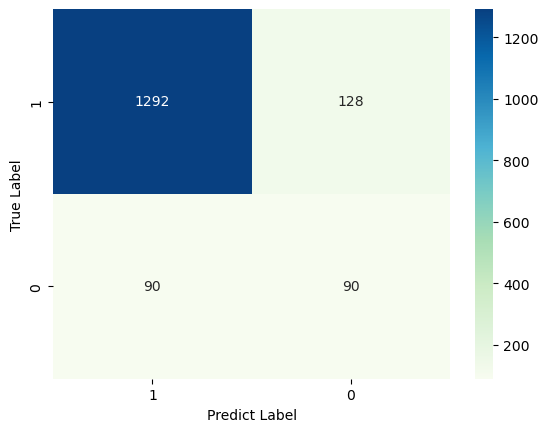

In [168]:
#Membuat heatmap matriks konfusi
sns.heatmap(conf_matrix['klasifikasi_naivebayes'],annot=True,cmap='GnBu',fmt='.4g').set(ylabel='True Label',xlabel='Predict Label')
plt.show()

In [169]:
#Hasil Peluang Klasifikasi Naive Bayes tiap observasi
nb.predict_proba(x_testnb)

array([[0.99710079, 0.00289921],
       [0.15894486, 0.84105514],
       [0.99395824, 0.00604176],
       ...,
       [0.99526728, 0.00473272],
       [0.98821228, 0.01178772],
       [0.97663296, 0.02336704]])

In [170]:
y_predictnb2 = nb.predict(x_testnb)
conf_matrixnb = confusion_matrix(y_testnb, y_predictnb2)
conf_matrixnb

array([[1292,  128],
       [  90,   90]], dtype=int64)

In [189]:
akurasi = accuracy_score(y_testnb,y_predictnb2)
presisi = precision_score(y_testnb,y_predictnb2, pos_label = 0, average = None)
recalls = recall_score(y_testnb,y_predictnb2,pos_label = 0, average = None)
sensitivitas = conf_matrixnb[0,0]/(conf_matrixnb[0,0]+conf_matrixnb[0,1])
spesifitas = conf_matrixnb[1,1]/(conf_matrixnb[1,0]+conf_matrixnb[1,1])
f1_score = f1_score(y_testnb,y_predictnb2)
print('Akurasi', akurasi)
print('Presisi',presisi)
print('Recalls',recalls)
print('Sensitivitas',sensitivitas)
print('Spesifitas',spesifitas)
print('F1 score',f1_score)

C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\Rania Yunaningrum\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 0) is ignored when average != 'binary' (got None). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


TypeError: 'numpy.float64' object is not callable

In [ ]:
#Model Akurasi
print('Akurasi Metode Naive Bayes:',metrics.accuracy_score(y_testnb,nb.predict(x_testnb)))